In [10]:
import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint


from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

# load data

In [11]:
train_directory = './train'
train_image_list = []

for class_name in os.listdir(train_directory):
    
    class_path = train_directory+'/'+class_name
    
    for img_name in os.listdir(class_path):
        if img_name.endswith(".jpg"):
            img_path = train_directory+'/'+class_name+'/'+img_name
            train_image_list.append([class_name,img_path])

In [12]:
test_directory = './testset'

test_image_list = []

for test_img in os.listdir(test_directory):
    test_img_path = test_directory+'/'+test_img
    test_image_list.append([None,test_img_path,test_img[:-4]])

In [13]:
train_data = pd.DataFrame(train_image_list,columns=['class','path'])
test_data = pd.DataFrame(test_image_list,columns=['class','path','test_img'])

In [14]:
class_mapping = {
    'CALsuburb':9,
    'PARoffice':7,
    'bedroom':12,
    'coast':10,
    'forest':4,
    'highway':14,
    'industrial':2,
    'insidecity':3,
    'kitchen':0,
    'livingroom':5,
    'mountain':8,
    'opencountry':6,
    'store':11,
    'street':1,
    'tallbuilding':13
}

In [15]:
train_data['class'] = train_data['class'].map(class_mapping)

In [16]:
train_data.head()

,class,path
0,13,./train/tallbuilding/image_0025.jpg
1,13,./train/tallbuilding/image_0030.jpg
2,13,./train/tallbuilding/image_0072.jpg
3,13,./train/tallbuilding/image_0139.jpg
4,13,./train/tallbuilding/image_0069.jpg


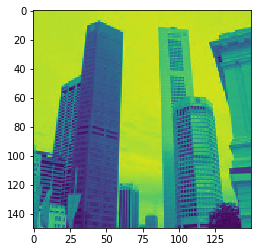

In [17]:
img = cv2.imread('./train/tallbuilding/image_0069.jpg', 0)
img = cv2.resize(img,(150,150))
plt.imshow(img)

In [18]:
img_loc = train_data['path'].values

In [19]:
img_arr = []
for loc in img_loc:
    
    img = cv2.imread(loc, 0)
    img = cv2.resize(img,(150,150))
    img_arr.append(img)


In [20]:
img_arr = np.array(img_arr)

In [21]:
img_arr = img_arr.reshape(img_arr.shape[0],150,150,1)

In [22]:
img_arr.shape

(2985, 150, 150, 1)

In [23]:
y_train = train_data['class']

In [24]:
X_train_all = np.array(img_arr)
y_train_all = np.eye(15)[y_train.values]

In [25]:

split_idx = X_train_all.shape[0]

In [26]:
test_img_loc = test_data['path'].values
test_img_arr = []
for loc in test_img_loc:
    
    img = cv2.imread(loc, 0)
    img = cv2.resize(img,(150,150))
    test_img_arr.append(img)
test_img_arr = np.array(test_img_arr)
test_img_arr = test_img_arr.reshape(test_img_arr.shape[0],150,150,1)

In [27]:
test_img_arr.shape

(1500, 150, 150, 1)

In [28]:
all_data = np.concatenate((X_train_all, test_img_arr), axis=0)

In [29]:
#z-score

all_data = all_data.astype('float32')
mean = np.mean(all_data,axis=(0,1,2,3))
std = np.std(all_data,axis=(0,1,2,3))
all_data = (all_data-mean)/(std+1e-7)

In [30]:
X_train_all.shape

(2985, 150, 150, 1)

In [31]:
X_train_all = all_data[:split_idx]

In [32]:
test_img_arr = all_data[split_idx:]

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X_train_all,y_train_all,test_size=0.2,random_state=43,stratify=y_train_all)

x_train2,x_test2,y_train2,y_test2 = train_test_split(X_train_all,y_train_all,test_size=0.15,random_state=9,stratify=y_train_all)

x_train3,x_test3,y_train3,y_test3 = train_test_split(X_train_all,y_train_all,test_size=0.15,random_state=17,stratify=y_train_all)

In [42]:
baseMapNum = 64
weight_decay = 1e-4
num_classes = 15
batch_size = 8
epochs=50

In [43]:
len(train_data['path'])

2985

In [44]:
len(y_train_all)

2985

In [45]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import numpy as np

In [48]:







model = Sequential()
model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))



model.add(Conv2D(3*baseMapNum, (3,3), strides=(2, 2),padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(Conv2D(3*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))


# model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))

model.add(AveragePooling2D(pool_size=(3,3)))
# model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

#data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(x_train)

#training

opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=x_train.shape[0] // batch_size,epochs=3*epochs,verbose=1,validation_data=(x_test,y_test))
model.save_weights('cifar10_normal_rms_ep75.h5')

opt_rms = keras.optimizers.rmsprop(lr=0.0005,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train2, y_train2, batch_size=batch_size),steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,verbose=1,validation_data=(x_test2,y_test2))
model.save_weights('cifar10_normal_rms_ep100.h5')

opt_rms = keras.optimizers.rmsprop(lr=0.0003,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train3, y_train3, batch_size=batch_size),steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,verbose=1,validation_data=(x_test3,y_test3))
model.save_weights('cifar10_normal_rms_ep125.h5')

opt_rms = keras.optimizers.rmsprop(lr=0.0005,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
model.fit_generator(datagen.flow(X_train_all, y_train_all, batch_size=batch_size),steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
model.save_weights('cifar10_normal_rms_ep130.h5')



#testing - no kaggle eval
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 150, 150, 64)      640       
_________________________________________________________________
activation_42 (Activation)   (None, 150, 150, 64)      0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 150, 150, 64)      256       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
activation_43 (Activation)   (None, 150, 150, 64)      0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 150, 150, 64)      256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 75, 75, 64)        0         
__________

298/298 [==============================] - 13s 45ms/step - loss: 0.8229 - acc: 0.7848 - val_loss: 1.2139 - val_acc: 0.7219
Epoch 37/150
298/298 [==============================] - 13s 45ms/step - loss: 0.8581 - acc: 0.7781 - val_loss: 1.1562 - val_acc: 0.6985
Epoch 38/150
298/298 [==============================] - 13s 45ms/step - loss: 0.8159 - acc: 0.7806 - val_loss: 1.3046 - val_acc: 0.6834
Epoch 39/150
298/298 [==============================] - 13s 45ms/step - loss: 0.7981 - acc: 0.7844 - val_loss: 1.0946 - val_acc: 0.7521
Epoch 40/150
298/298 [==============================] - 13s 45ms/step - loss: 0.7795 - acc: 0.7982 - val_loss: 1.2558 - val_acc: 0.7052
Epoch 41/150
298/298 [==============================] - 13s 45ms/step - loss: 0.8012 - acc: 0.7873 - val_loss: 1.2855 - val_acc: 0.7152
Epoch 42/150
298/298 [==============================] - 13s 45ms/step - loss: 0.7979 - acc: 0.7886 - val_loss: 1.3589 - val_acc: 0.6817
Epoch 43/150
298/298 [==============================] - 13s 4

298/298 [==============================] - 13s 45ms/step - loss: 0.5850 - acc: 0.8687 - val_loss: 0.9718 - val_acc: 0.7672
Epoch 97/150
298/298 [==============================] - 13s 45ms/step - loss: 0.5906 - acc: 0.8637 - val_loss: 0.9656 - val_acc: 0.7705
Epoch 98/150
298/298 [==============================] - 13s 45ms/step - loss: 0.5421 - acc: 0.8746 - val_loss: 1.5391 - val_acc: 0.7052
Epoch 99/150
298/298 [==============================] - 13s 45ms/step - loss: 0.5582 - acc: 0.8742 - val_loss: 1.0382 - val_acc: 0.7889
Epoch 100/150
298/298 [==============================] - 13s 45ms/step - loss: 0.5736 - acc: 0.8683 - val_loss: 1.3898 - val_acc: 0.7052
Epoch 101/150
298/298 [==============================] - 13s 45ms/step - loss: 0.5654 - acc: 0.8754 - val_loss: 0.8867 - val_acc: 0.7990
Epoch 102/150
298/298 [==============================] - 13s 45ms/step - loss: 0.5539 - acc: 0.8721 - val_loss: 1.5783 - val_acc: 0.6935
Epoch 103/150
298/298 [==============================] - 1

298/298 [==============================] - 13s 44ms/step - loss: 0.4258 - acc: 0.9123 - val_loss: 0.4824 - val_acc: 0.9196
Epoch 7/50
298/298 [==============================] - 13s 44ms/step - loss: 0.4410 - acc: 0.9153 - val_loss: 0.4814 - val_acc: 0.9174
Epoch 8/50
298/298 [==============================] - 13s 44ms/step - loss: 0.4241 - acc: 0.9140 - val_loss: 0.5421 - val_acc: 0.8973
Epoch 9/50
298/298 [==============================] - 13s 44ms/step - loss: 0.4301 - acc: 0.9098 - val_loss: 0.5699 - val_acc: 0.8996
Epoch 10/50
298/298 [==============================] - 13s 44ms/step - loss: 0.4514 - acc: 0.9056 - val_loss: 0.4985 - val_acc: 0.8996
Epoch 11/50
298/298 [==============================] - 13s 44ms/step - loss: 0.4184 - acc: 0.9148 - val_loss: 0.4705 - val_acc: 0.8973
Epoch 12/50
298/298 [==============================] - 13s 44ms/step - loss: 0.4219 - acc: 0.9169 - val_loss: 0.5479 - val_acc: 0.9107
Epoch 13/50
298/298 [==============================] - 13s 44ms/step -

Epoch 17/50
298/298 [==============================] - 13s 44ms/step - loss: 0.3007 - acc: 0.9383 - val_loss: 0.3448 - val_acc: 0.9621
Epoch 18/50
298/298 [==============================] - 13s 44ms/step - loss: 0.2706 - acc: 0.9526 - val_loss: 0.3252 - val_acc: 0.9621
Epoch 19/50
298/298 [==============================] - 13s 44ms/step - loss: 0.2755 - acc: 0.9450 - val_loss: 0.2949 - val_acc: 0.9621
Epoch 20/50
298/298 [==============================] - 13s 44ms/step - loss: 0.2603 - acc: 0.9513 - val_loss: 0.3535 - val_acc: 0.9420
Epoch 21/50
298/298 [==============================] - 13s 44ms/step - loss: 0.2691 - acc: 0.9501 - val_loss: 0.2696 - val_acc: 0.9621
Epoch 22/50
298/298 [==============================] - 13s 44ms/step - loss: 0.2774 - acc: 0.9450 - val_loss: 0.2851 - val_acc: 0.9621
Epoch 23/50
298/298 [==============================] - 13s 44ms/step - loss: 0.2565 - acc: 0.9547 - val_loss: 0.2936 - val_acc: 0.9643
Epoch 24/50
298/298 [==============================] - 

Epoch 28/50
298/298 [==============================] - 14s 46ms/step - loss: 0.2838 - acc: 0.9497 - val_loss: 0.2649 - val_acc: 0.9548
Epoch 29/50
298/298 [==============================] - 13s 45ms/step - loss: 0.3324 - acc: 0.9325 - val_loss: 0.1753 - val_acc: 0.9765
Epoch 30/50
298/298 [==============================] - 13s 45ms/step - loss: 0.2962 - acc: 0.9404 - val_loss: 0.1795 - val_acc: 0.9816
Epoch 31/50
298/298 [==============================] - 13s 45ms/step - loss: 0.2824 - acc: 0.9480 - val_loss: 0.2362 - val_acc: 0.9615
Epoch 32/50
298/298 [==============================] - 13s 45ms/step - loss: 0.3135 - acc: 0.9304 - val_loss: 0.1886 - val_acc: 0.9816
Epoch 33/50
298/298 [==============================] - 14s 45ms/step - loss: 0.3088 - acc: 0.9450 - val_loss: 0.1676 - val_acc: 0.9883
Epoch 34/50
298/298 [==============================] - 13s 45ms/step - loss: 0.3158 - acc: 0.9371 - val_loss: 0.2236 - val_acc: 0.9682
Epoch 35/50
298/298 [==============================] - 

In [49]:
ans = model.predict_classes(test_img_arr)

In [50]:
test_data['class'] = ans

In [51]:
sub = pd.read_csv('./img-submission.csv')

In [52]:
mapping = {}

for i in range(len(sub)):
    val = sub.iloc[i]['id']
    mapping[val]=i

In [53]:
test_data['order'] = test_data['test_img'].map(mapping)

In [54]:
test_data = test_data.sort_values(by='order')

In [55]:
test_data.reset_index(drop=True,inplace=True)

In [56]:
sub['class'] = test_data['class'].values

In [57]:
sub.to_csv('./ans.csv',index=False)

In [ ]:
# from sklearn.utils import shuffle 

# def simpson_train_batch_generator(x, y, bs, shape):
#     x_train = np.array([]).reshape((0, shape))
#     y_train = np.array([]).reshape((0, y.shape[1]))
#     while True:
#         new_ind = shuffle(range(len(x)))
#         x = x.take(new_ind)
#         y = np.take(y, new_ind, axis=0)
#         for i in range(len(x)):
            
            
#             dir_img = X_train.iloc[i]
            
#             img = cv2.imread(dir_img, 0)
#             img = cv2.resize(img, img_resize)
#             x_train = np.row_stack([x_train, img.flatten()])
#             y_train = np.row_stack([y_train, y[i]])
#             if x_train.shape[0] == bs:
#                 x_batch = x_train.copy()
#                 x_batch /= 255.
#                 y_batch = y_train.copy()
#                 x_train = np.array([]).reshape((0 ,shape))
#                 y_train = np.array([]).reshape((0 ,y.shape[1]))        
#                 yield x_batch, y_batch

# def simpson_test_batch_generator(x, shape):
#     x_test = np.array([]).reshape((0, shape))
#     for i in range(len(x)):
#         dir_img = X_validate.iloc[i]
#         img = cv2.imread(dir_img, 0)
#         img = cv2.resize(img, img_resize)
#         x_test = np.row_stack([x_test, img.flatten()])
#     x_test /= 255.      
#     return x_test

# x_test = simpson_test_batch_generator(X_validate, flatten_len)